<a href="https://colab.research.google.com/github/pragneshrana/DeepLearning/blob/master/SequenceModels/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Problems with CNN
  - Outputs are dependent on input
  - Inputs are of fixed length

# Sequence Model :
 - Prediction of words after certains letters
  - length is unknown
  - Output depends on previous output
  - Ex: 'Ze' -> 'Zebra' , 'Zen' , 'Zee'
 - Part of Speech tagging problem
  - Given input generate sentences based on previous output
  - Outof 10 words each word is assigned using OneHotEncode
    - game(index=3), play,...
    - Representation of game = [0 0 0 1 0 0 0 0 0 0]
 - Other example
  - Speech Recognition
  - Speech Recognition - Mood Classification
  - Video - Sequence of frame and - Classification

# Types  Sequence learning problem
 - Output at every stage - Word prediction : Output after every Sequence
  - $\hat y_t = \hat f(x_1,x_2,...x_t)$
 - Output at the end - Video Classification : Process many video frames and finally gives output - After many Sequence
  - $\hat y_T = \hat f(x_1,x_2,...x_T)$

- Function Properties:
  - $y_t$ is dependent on previous input
  - function can deal with variable number of inputs
  - Same function is executed at each and every time step

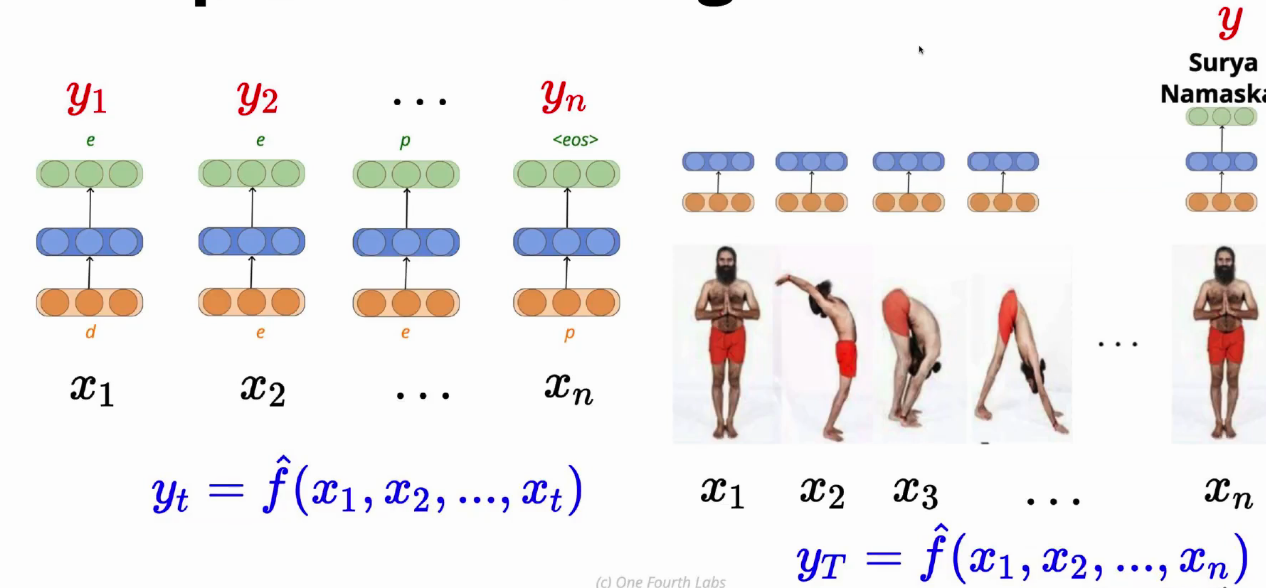

# Model:
$s_i = \sigma (Ux_i+b)$ \
$y_i = \sigma (Vs_i+c)$ \
**Note that weights and biases are same for each model - such parameter sharing approach shows dependecy**

One of the solution is to use all input by doing algera. But Originality of input will be lost. See image \

**Note : Don't DO **

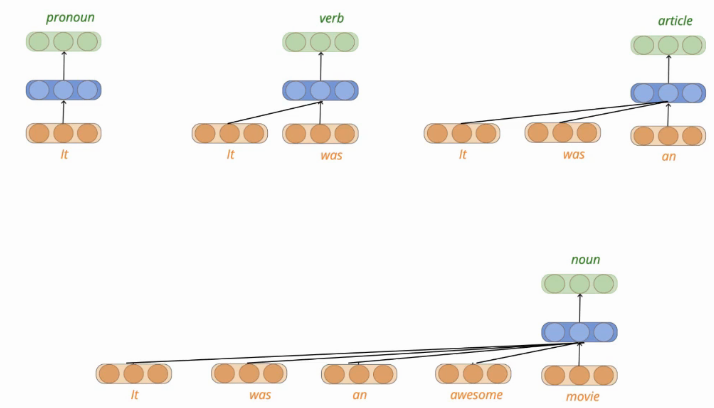

# Can we do better?
 
**Model :**
  - $s_i = \sigma (Ux_i+ Ws_{i-1}+b)$ \
  - $y_i = \sigma (Vs_i+c) = \hat f(x_i,s_{i-1},W,U,V,b,c) $\
**Note that weights and biases are same for each model**

n - inputs \
d - Hidden layer \
k - output \
$x_i \in \mathcal R ^{nX1}$ \
$s_{i-1} \in \mathcal R ^{dX1}$ \
$U \in \mathcal R ^{dXn}$ \
$W \in \mathcal R ^{dXd}$ \
$V \in \mathcal R ^{kXd}$ \

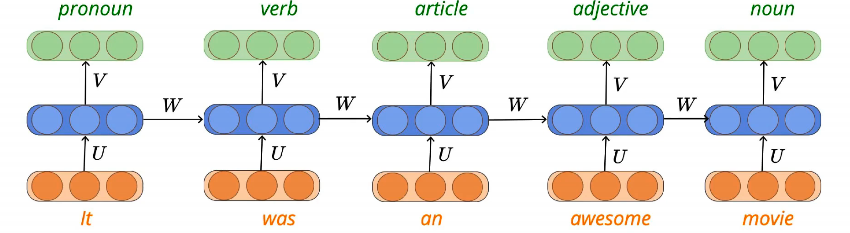

for example, \
$y_4 = \mathcal{O}(V s_4 + c) $  
$s_4 = \sigma (Ux_3 + W s_3 + b)$ \
$s_3 = \sigma (Ux_2 + W s_2 + b)$ \
$s_2 = \sigma (Ux_2 + W s_1 + b)$ \
$s_1 = \sigma (Ux_1 + W s_0 + b)$ \


# Model has recurrent connection among them -> Recuurent Neural Network

- How to represent words & char?
- Loss function?
- How to train?

### Data and Task
 - Sequence classification : sentiment classification, Video classification
 - Sequence labelling : part of speech tagging, named entity recoginition(like name of city, person in sentence)
 - Sequence generation : machine translation, transliteration (script change)

### Procedure:
  - Lower case all the words
  - compute the total number of unique words across all sentences
  - Assign unique id to each word
  - Represent each word using a L dimentional binary vector with only the bit corresponding to the word id set to 1 (OneHotCoder)

### Terms:
- $<sos>$ - start of statement
- $<eos>$ - end of statement
- $<pad>$ - padding

# Sequence Classification 

$\begin{bmatrix}
x_0 & x_1 & x_2 & x_3 & x_4 & x_5 & x_6 \\
<sos> & Movie & was & great & . & <eos> & <pad> \\
<sos> & Awesome & movie & . & <eos> & <pad> & <pad>\\
<sos> & First & half & was & boring& . & <eos>  \\
<sos> & Beautiful & actress & ! & <eos> & <pad> & <pad>\\
\end{bmatrix}
=
\begin{bmatrix}
y\\
1\\
1\\
0\\
1\\
\end{bmatrix}
$

### Dictionary:
ID | Word | OneHotRepresentation
---|---|---
0 | \<sos\> | [ 1 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
1 | \<eos\> | [ 0 1 0 0 0 0 0 0 0 0 0 0 0 0 ]
2 | \<pad\> | [ 0 0 1 0 0 0 0 0 0 0 0 0 0 0 ]
3 | movie | [ 0 0 0 1 0 0 0 0 0 0 0 0 0 0 ]
4 | was  | [ 0 0 0 0 1 0 0 0 0 0 0 0 0 0 ]
5 | great | [ 0 0 0 0 0 1 0 0 0 0 0 0 0 0 ]
6 | . | [ 0 0 0 0 0 0 1 0 0 0 0 0 0 0 ]
7 | awesome | [ 0 0 0 0 0 0 0 1 0 0 0 0 0 0 ]
8 | first | [ 0 0 0 0 0 0 0 1 0 0 0 0 0 0 ]
9 | half | [ 0 0 0 0 0 0 0 0 0 1 0 0 0 0 ]
10 | boring | [ 0 0 0 0 0 0 0 0 0 0 1 0 0 0 ]
11 | beautiful | [ 0 0 0 0 0 0 0 0 0 0 0 1 0 0 ]
12 | actress | [ 0 0 0 0 0 0 0 0 0 0 0 0 1 0 ]
13 | ! | [ 0 0 0 0 0 0 0 0 0 0 0 0 0 1 ]


$\begin{bmatrix}
x_0 & x_1 & x_2 & x_3 & x_4 & x_5 & x_6 \\
<sos> & Movie & was & great & . & <eos> & <pad> \\
<sos> & Awesome & movie & . & <eos> & <pad> & <pad>\\
<sos> & First & half & was & boring& . & <eos>  \\
<sos> & Beautiful & actress & ! & <eos> & <pad> & <pad>\\
\end{bmatrix}
= 
\begin{bmatrix}
x_0 & x_1 & x_2 & x_3 & x_4 & x_5 & x_6 \\
0 & 3 & 4 & 5 & 6 & 1 & 2 \\
0 & 7 & 3 & 6 & 1 & 2 & 2\\
0 & 8 & 9 & 4 & 10 & 6 & 1  \\
0 & 11 & 12 & 13 & 1 & 2 & 2\\
\end{bmatrix}
$

## OneHotEncoded Final Matrix Form
$
\begin{bmatrix}
x_0 & x_1 & x_2 & x_3 & x_4 & x_5 & x_6 \\
[ 1 0 0 0 0 0 0 0 0 0 0 0 0 0 ] & [ 0 0 0 1 0 0 0 0 0 0 0 0 0 0 ] & [ 0 0 0 0 1 0 0 0 0 0 0 0 0 0 ] & [ 0 0 0 0 0 1 0 0 0 0 0 0 0 0 ]& [ 0 0 0 0 0 0 1 0 0 0 0 0 0 0 ] & [ 0 1 0 0 0 0 0 0 0 0 0 0 0 0 ] & [ 0 0 1 0 0 0 0 0 0 0 0 0 0 0 ]\\
[ 1 0 0 0 0 0 0 0 0 0 0 0 0 0 ] & [ 0 0 0 0 0 0 0 1 0 0 0 0 0 0 ] & [ 0 0 0 1 0 0 0 0 0 0 0 0 0 0 ] & [ 0 0 0 0 0 0 1 0 0 0 0 0 0 0 ] & [ 0 1 0 0 0 0 0 0 0 0 0 0 0 0 ] & [ 0 0 1 0 0 0 0 0 0 0 0 0 0 0 ] & [ 0 0 1 0 0 0 0 0 0 0 0 0 0 0 ]\\
[ 1 0 0 0 0 0 0 0 0 0 0 0 0 0 ] & [ 0 0 0 0 0 0 0 1 0 0 0 0 0 0 ] & [ 0 0 0 0 0 0 0 0 0 1 0 0 0 0 ] & [ 0 0 0 0 1 0 0 0 0 0 0 0 0 0 ] & [ 0 0 0 0 0 0 0 0 0 0 1 0 0 0 ] & [ 0 0 0 0 0 0 1 0 0 0 0 0 0 0 ] & [ 0 1 0 0 0 0 0 0 0 0 0 0 0 0 ]  \\
[ 1 0 0 0 0 0 0 0 0 0 0 0 0 0 ] & [ 0 0 0 0 0 0 0 0 0 0 0 1 0 0 ] & [ 0 0 0 0 0 0 0 0 0 0 0 0 1 0 ] & [ 0 0 0 0 0 0 0 0 0 0 0 0 0 1 ] & [ 0 1 0 0 0 0 0 0 0 0 0 0 0 0 ] & [ 0 0 1 0 0 0 0 0 0 0 0 0 0 0 ] & [ 0 0 1 0 0 0 0 0 0 0 0 0 0 0 ]\\
\end{bmatrix}
$

### Is adding padding to matrix change output?
- Padding is just to create compatible input to generate matrix
- Generally output is generated at the end of the sequence

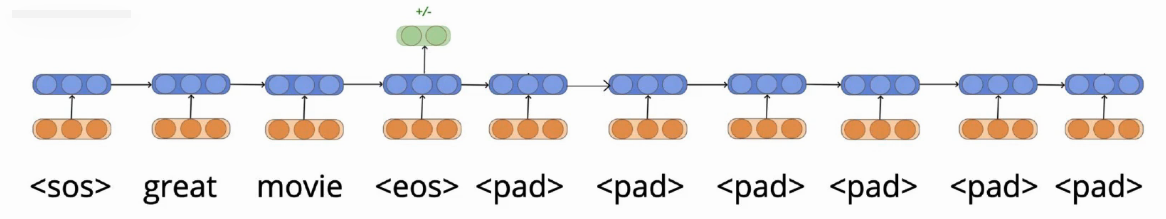

### Similar Procedure can be done for y matrix if outputs are multiple.

# Model:
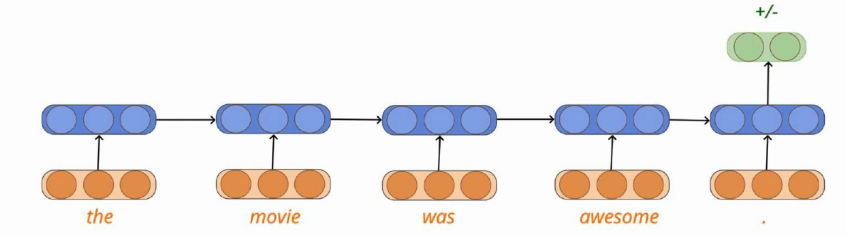

# Loss Function:

$\mathcal{L} = - \frac{1}{m}\sum_i^m \sum_j^T \log y_{ijc}$

m = number of similar function (above 5)\
T = total size of output in OneHotEncoder

# Algorithm:

- Initialize: $w_1, w_2,..,w_n $ & $b$
- Iterate over data: 
    - compute $\hat y$
    - compute Loss $\mathcal{L} (w,b)$
    - $w_{11} = w_{11} + \eta \Delta w_{11} $ \
    - $w_{12} = w_{12} + \eta \Delta w_{12} $ \
    - $u_{11} = u_{11} + \eta \Delta u_{11} $ \
    - $\cdot$
    - $\cdot$
    - $v_{13} = v_{13} + \eta \Delta v_{13} $ \
    - till satisfied 
  

### How to calculate gradients?